In [10]:
#Import relevant libraries
import pandas as pd #data exploration, userfriendly dataframe formatting
import numpy as np #
import matplotlib.pyplot as plt
import seaborn as sns
import datetime # may be useful for tracking release date data from 
import os

In [11]:
# df_char = pd.read_csv("C:\\Users\\gnchu\\Downloads\\cleaned data\\cleaned_characters(1).csv")
# df_sex = pd.read_csv("C:\\Users\\gnchu\\Downloads\\cleaned data\\cleaned_sexualization.csv")
# '/home/simonet/CFG_Project_G4/CFG_Degree_Project_Group_4/notebooks/archive/cleaned_characters.csv

In [12]:
#Reading csv files into pandas dataframe format
df_char = pd.read_csv('cleaned_characters.csv')
df_char.head(2)

,Name,Gender,Game,Age_range,Playable,Sexualization_total,Id,Species,Alliance,Function,Romantic_Interest
0,Farah,Female,CODMW,Adult,1,0,CODMW_Farah,Human,Protagonist,PA,0
1,Protagonist,Custom,PSS,Teenager,1,0,PSS_Protagonist,Human,Protagonist,PA,0


In [13]:

df_sex = pd.read_csv("cleaned_sexualization.csv")
df_sex.head(2)

,character_id,Sexualized_clothing,Trophy,Damsel in Distress,Sexualized Cutscenes,Total
0,CODMW_Farah,0,0,0,0,0
1,PSS_Protagonist,0,0,0,0,0


In [14]:
df_game = pd.read_csv("cleaned_games.csv")
df_game.head(2)

,Unnamed: 0,Game_Id,Title,Release,Developer,Country,Protagonist,Protagonist_Non_Male,Percentage_non_male
0,0,GTAV,Grand Theft Auto V,Sep-13,Rockstar North,GBR,3,0,18%
1,1,PSS,Pokémon Sword/Shield,Nov-19,Game Freak,JPN,1,1,56%


In [15]:
f"Data frame row, column shape: Character:{df_char.shape} Sexualization:{df_sex.shape}, Game: {df_game.shape}"

'Data frame row, column shape: Character:(637, 11) Sexualization:(637, 6), Game: (64, 9)'

In [16]:
#Data types of all three frames called through dytpe function, inspection as frames will need to be merged for insights
df_sex.dtypes

character_id            object
Sexualized_clothing      int64
Trophy                   int64
Damsel in Distress       int64
Sexualized Cutscenes     int64
Total                    int64
dtype: object

In [17]:
df_char.dtypes

Name                   object
Gender                 object
Game                   object
Age_range              object
Playable                int64
Sexualization_total     int64
Id                     object
Species                object
Alliance               object
Function               object
Romantic_Interest       int64
dtype: object

In [18]:
df_game.dtypes

Unnamed: 0               int64
Game_Id                 object
Title                   object
Release                 object
Developer               object
Country                 object
Protagonist              int64
Protagonist_Non_Male     int64
Percentage_non_male     object
dtype: object

## The key insights gained from describe() function being:
* Due to the use of categorical (binary) data in our dataset, for example playable character in the describe function gives us limited insight. Majority of our data consists of categorical
data, however understanding the structure of our data is still valuable.
* Equal number of rows for all columns.
* Binary columns with 0,1 representing Yes, No options provide a statistical minimum of 0 and maximum of 1.
* Other categorical columns such as Sexualization total and romantic interest yield minimums of 0 and maximum of 3, 2 respectively.


In [19]:
# How the mean is achieved by describe, however for our categorical data the insights aren't as helpful
#df_char['Sexualization_total'].sum() -- 55
#df_char['Sexualization_total'].count() -- 637
mean_df = df_char['Sexualization_total'].sum() / df_char['Sexualization_total'].count() * 100
mean_df

np.float64(8.634222919937205)

In [20]:
df_char.describe()

,Playable,Sexualization_total,Romantic_Interest
count,637.000000,637.000000,637.000000
mean,0.193093,0.086342,0.124019
std,0.395035,0.389022,0.454195
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,3.000000,2.000000


In [21]:
df_sex.describe()

,Sexualized_clothing,Trophy,Damsel in Distress,Sexualized Cutscenes,Total
count,637.000000,637.000000,637.000000,637.000000,637.000000
mean,0.029827,0.010989,0.028257,0.017268,0.086342
std,0.170244,0.104333,0.165838,0.130372,0.389022
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,3.000000


In [22]:
df_game.describe()

,Unnamed: 0,Protagonist,Protagonist_Non_Male
count,64.000000,64.000000,64.000000
mean,31.500000,1.250000,0.546875
std,18.618987,0.590937,0.561452
min,0.000000,1.000000,0.000000
25%,15.750000,1.000000,0.000000
50%,31.500000,1.000000,1.000000
75%,47.250000,1.000000,1.000000
max,63.000000,4.000000,2.000000


### The focus of the following exploration will be the df_char dataframe - followed by some merging in order to expand df_char insights

Insight: 
* The split between male and female is almost half, which is refreshing to see, although the data set could be made larger with more recent data, it may be indicative of increase interest amongst non-males in gaming.
* There is a significant unrepresentation of non-binary characters, this may be due to concepts such as non-binary being culturally salient in certain cultures only. Game developers/ designers may not conceive of non- binary terms around gender in the same manner.


## Head() and Sample() of df_char data frame:

In [23]:
df_sex.head(5)

,character_id,Sexualized_clothing,Trophy,Damsel in Distress,Sexualized Cutscenes,Total
0,CODMW_Farah,0,0,0,0,0
1,PSS_Protagonist,0,0,0,0,0
2,PSS_Magnolia,0,0,0,0,0
3,PSS_Sonia,0,0,0,0,0
4,PSS_Marnie,0,0,0,0,0


In [24]:
df_char.sample(5)

,Name,Gender,Game,Age_range,Playable,Sexualization_total,Id,Species,Alliance,Function,Romantic_Interest
275,Godwyn,Male,ER,Adult,0,0,ER_Godwyn,Human,Antagonist,SC,0
600,Aurora,Female,COL,Teenager,1,0,COL_Aurora,Human,Protagonist,PA,0
43,Carley,Female,TWD,Adult,0,0,TWD_Carley,Human,Protagonist,SC,0
450,Commander,Male,SSDT,Adult,0,0,SSDT_Commander,Human,Antagonist,SC,0
160,Atreus,Male,GOW,Child,0,0,GOW_Atreus,Human,Protagonist,DA,0


### * Head(n) returns n number of top rows, helpful in our check on whether the dataset has imported correctly and the general profile of our data. 
### *Sample(n) generates n rows from the dataset,  interestingly at least 3 males show in 5 runs of the sample() function, this is not sufficient enough for any conclusion.

In [25]:
df_gen= df_char['Gender'].value_counts()
print(df_gen)

Gender
Male          393
Female        203
Non-binary     33
Custom          8
Name: count, dtype: int64


In [26]:
gender_percent = df_char['Gender'].value_counts(normalize = True)

full_percent = round(gender_percent * 100,2).astype(float)

full_percent_formatted = full_percent.apply(lambda x: f"{x:}%") # apply and lamdba x to reformat my value count percentage output to include a '%'
print(full_percent_formatted)

Gender
Male           61.7%
Female        31.87%
Non-binary     5.18%
Custom         1.26%
Name: proportion, dtype: object


### As the above shows, in our data set males represent over half of the characters in popular video games between 2012-2022. Female characters make up over 30%, non binary make up just 5% of characters and custom just over 1%. So if a player chooses a popular video game between these years approximately 38% will contain specifically non-male characters.

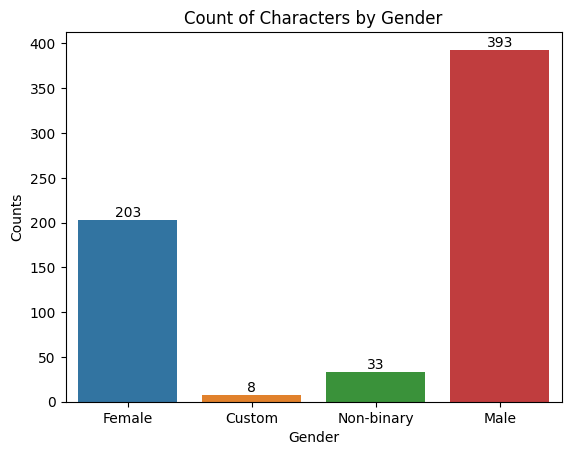

In [27]:
ax = sns.countplot(data=df_char, x="Gender", hue= "Gender")
ax.set(xlabel= 'Gender', ylabel='Counts', title='Count of Characters by Gender',)
gen_counts = ax.set_ylabel('Counts')
for container in ax.containers: 
    ax.bar_label(container) 
plt.show()

### What are the trends, if any, when gender percentage is split by age range?

In [28]:
df_gen= df_char[['Gender','Age_range']].value_counts()
print(df_gen)

Gender      Age_range  
Male        Adult          177
Female      Adult           82
Male        Unknown         71
            Middle-aged     49
Female      Unknown         36
            Young adult     30
Male        Young adult     29
Non-binary  Unknown         28
Male        Child           25
Female      Teenager        24
Male        Elderly         22
            Teenager        18
Female      Middle-aged     13
            Child           10
            Elderly          7
Custom      Adult            4
            Teenager         2
Non-binary  Teenager         2
Male        Infant           2
Custom      Child            1
            Unknown          1
Female      Infant           1
Non-binary  Adult            1
            Middle-aged      1
            Child            1
Name: count, dtype: int64


In [29]:
gender_age = df_char[['Gender', 'Age_range']].value_counts(normalize = True)

gender_age_percent = round(gender_age * 100,2).astype(float)

gender_age_pc_format = gender_age_percent.apply(lambda x: f"{x:}%")

gender_age_pc_format

Gender      Age_range  
Male        Adult          27.79%
Female      Adult          12.87%
Male        Unknown        11.15%
            Middle-aged     7.69%
Female      Unknown         5.65%
            Young adult     4.71%
Male        Young adult     4.55%
Non-binary  Unknown          4.4%
Male        Child           3.92%
Female      Teenager        3.77%
Male        Elderly         3.45%
            Teenager        2.83%
Female      Middle-aged     2.04%
            Child           1.57%
            Elderly          1.1%
Custom      Adult           0.63%
            Teenager        0.31%
Non-binary  Teenager        0.31%
Male        Infant          0.31%
Custom      Child           0.16%
            Unknown         0.16%
Female      Infant          0.16%
Non-binary  Adult           0.16%
            Middle-aged     0.16%
            Child           0.16%
Name: proportion, dtype: object

For some clarity I will compare these percentages by gender:
* Approximately 40% of characters are adults in popular video games between 2012-2022 which is the most frequent age range.
* When split by gender, adult males make up 27.79%, females 12.7%, non-binary adults 0.16% and custom adults 0.63%.
* When split by gender characters with ages unknown, males make up 11.15%, females 5.56%, non-binary 4.4% and custom unknown 0.16%.
* When spplit by gender middle aged males make up 11.15% of characters, middle-aged females 2.04%, non-binary middle-aged 0.16%
* When split by gender young adults males 4.55%, females make up 4.71% and non-binary young adults 0%
-- teenage and younger have not been expressed in this summary

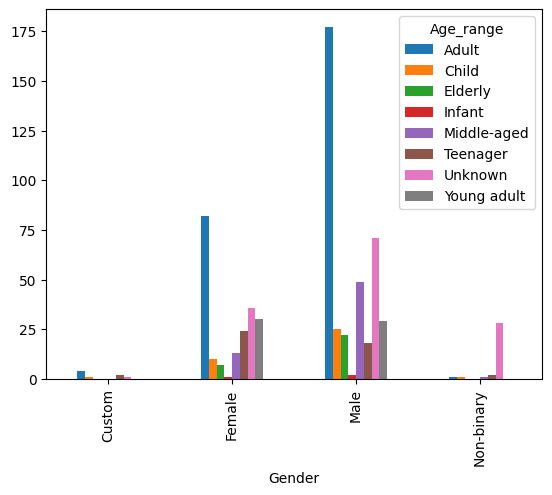

<Figure size 2000x1000 with 0 Axes>

In [30]:
gender_age_bar = df_char[['Gender','Age_range']].value_counts().unstack()
gender_age_bar.plot(kind='bar')
plt.figure(figsize=(20, 10))
plt.show()

### Is a character more/less likely to be a playable character depending on their assigned gender?

In [31]:
playable_gen = df_char[['Gender', 'Playable']].value_counts()
print(playable_gen)

Gender      Playable
Male        0           321
Female      0           170
Male        1            72
Female      1            33
Non-binary  0            23
            1            10
Custom      1             8
Name: count, dtype: int64


In [32]:
playable_gen = df_char[['Gender', 'Playable']].value_counts(normalize= True)

playable_gen = round(playable_gen * 100,2).astype(float)

playable_gen = playable_gen.apply(lambda x: f"{x:}%")

print(playable_gen)

Gender      Playable
Male        0           50.39%
Female      0           26.69%
Male        1            11.3%
Female      1            5.18%
Non-binary  0            3.61%
            1            1.57%
Custom      1            1.26%
Name: proportion, dtype: object


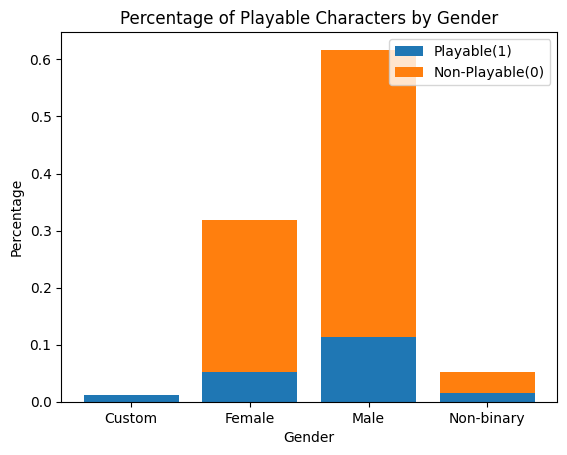

In [33]:
playable_gen = df_char[['Gender', 'Playable']].value_counts(normalize= True)
playable_gen_df = playable_gen.unstack()

#Extracting necessary data
gender_pl = playable_gen_df.index
playable_y = playable_gen_df[1]
playable_n = playable_gen_df[0]

#axis and figure 

fig,ax = plt.subplots()

#bar chart creation

ax.bar(gender_pl, playable_y, label= 'Playable(1)')
ax.bar(gender_pl, playable_n, label= 'Non-Playable(0)', bottom=playable_y)


ax.set_xlabel('Gender')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Playable Characters by Gender')

# Legend on top right 
ax.legend()


### Initially it was interesting that 50 % of males overall are non playable, just over 26% of females are non-playable, 11% of  males are playable, 
### 5% of females are playable (just under 50% comparatively), only 1.57% of non-binary characters in this dataset are playable.
### Interesting proportionally, as there are more male characters overall it may be expected that there will be more non-playable males in the game itself, only a select few main characters/protagonists etc. However, when we look at non-binary and female characters the percentage of non-playable are also higher however, when comparing playable characters, they are fewer than their male counterparts.

In [34]:
play_gen_func = df_char[['Gender', 'Function']].value_counts(normalize=True)

play_gen_func = round(play_gen_func * 100,2).astype(float)

play_gen_func = play_gen_func.apply(lambda x: f"{x:}%")

play_gen_func

Gender      Function
Male        SC          27.16%
            MC          18.84%
Female      SC          13.19%
            MC          12.24%
Male        PA           7.06%
            MA           5.97%
Female      PA           2.51%
            MA           1.73%
Non-binary  PA           1.73%
Male        DA           1.57%
Non-binary  SC           1.41%
Custom      PA           1.26%
Female      DA           1.26%
Male        SK            1.1%
Female      SK           0.94%
Non-binary  SK           0.78%
            MA           0.63%
            MC           0.63%
Name: proportion, dtype: object

In [68]:
#gender_play_age_bar = df_char[['Gender','Function']].value_counts().unstack()
# ax = gender_play_age_bar.plot(kind='bar')

# mylabels = ['deuteragonist', 'main antagonist', 'main character', 'protagonist', 'secondary character', 'side-kick'] # not working for me custom labels so full function name seen
# ax.legend(labels=mylabels)
# plt.show()

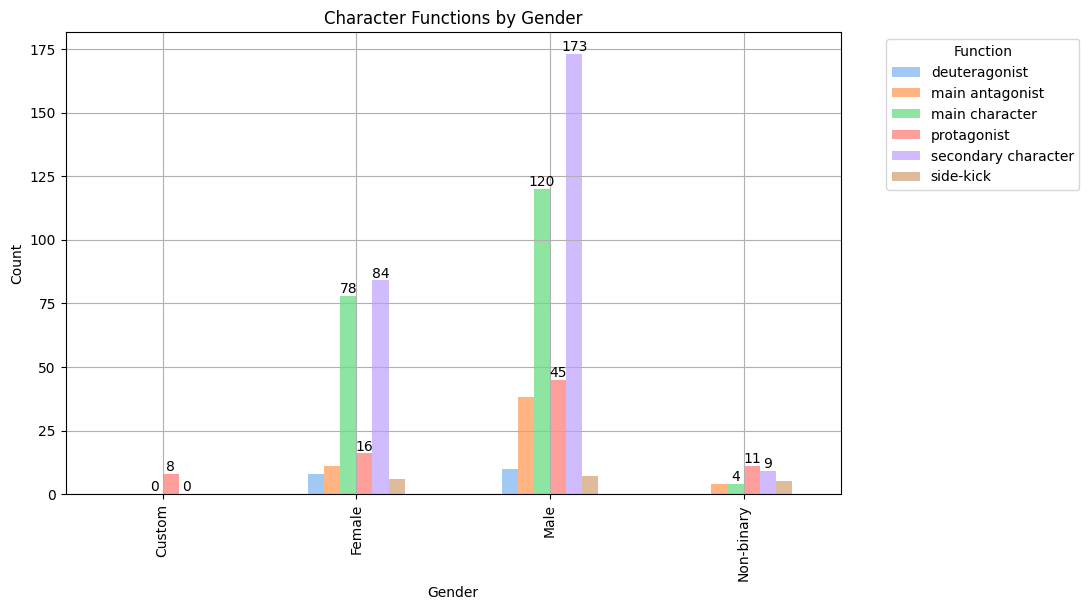

In [75]:
gender_play_age_bar = df_char[['Gender','Function']].value_counts().unstack()
# to get pastel color from sns
colors = sns.color_palette('pastel', n_colors=gender_play_age_bar.shape[1])

# adding colors
ax = gender_play_age_bar.plot(kind='bar', color=colors, figsize=(10, 6))

# labels
mylabels = ['deuteragonist', 'main antagonist', 'main character', 'protagonist', 'secondary character', 'side-kick']
ax.legend(labels=mylabels, title='Function', bbox_to_anchor=(1.05, 1), loc='upper left')


ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Character Functions by Gender')

plt.grid(True)

# number on only selected bars
selected_functions = ['protagonist', 'main character', 'secondary character']
selected_columns = [mylabels.index(func) for func in selected_functions]  # index of selected functions

for idx, container in enumerate(ax.containers):
    if idx in selected_columns:  # only labels on selected bars
        ax.bar_label(container, label_type='edge', fontsize=10) 


plt.show()



### Is there a general pattern in sexualization when we organise characters by gender? Is there a common pattern in those scoring high ( 2 - 3) for ‘sexualization_total’?

In [36]:
trend_sex_mode = df_char[['Gender', 'Sexualization_total']].mode() #male, sexualization total 0
trend_sex_mode

,Gender,Sexualization_total
0,Male,0


### Interesting to note, the modal total - as in most common occurance was for males with a sexualization total of 0. So males are the least sexualized and most common character gender.

In [37]:
trend_sex_3 = df_char[df_char['Sexualization_total'] == 3]
trend_sex_3

,Name,Gender,Game,Age_range,Playable,Sexualization_total,Id,Species,Alliance,Function,Romantic_Interest
17,Amanda,Female,GTAV,Middle-aged,0,3,GTAV_Amanda,Human,Both,SC,1
18,Tracy,Female,GTAV,Young adult,0,3,GTAV_Tracy,Human,Both,SC,0
231,Citra Taulgami,Female,FC3,Adult,0,3,FC3_Citra,Human,Both,MC,1


### When filtering for Sexualization total of 3, which is the highest count of sexualization for our data set: 
Gender of most sexualized characters were female non-playable.
Species being humans who may have an alliance with both sides.
Character function is a main character in one case and side character in two.
Two out of the three most sexualized characters were also considered the love interest in their game. 
Grand Theft Auto(side character) and Far Cry 3(main character)


In [38]:
#Only those meeting half of sexualization total, upper range - CORRECT THIS CODE
trend_sex_2 = df_char[df_char['Sexualization_total'] == 2]
trend_sex_2 

,Name,Gender,Game,Age_range,Playable,Sexualization_total,Id,Species,Alliance,Function,Romantic_Interest
6,Peach,Female,SMO,Adult,0,2,SMO_Peach,Human,Protagonist,MC,1
9,Ciri,Female,TW3,Young adult,0,2,TW3_Ciri,Human,Protagonist,DA,0
26,Tiara,Female,SMO,Unknown,0,2,SMO_Tiara,Animated Object,Protagonist,SC,0
33,Yennefer,Female,TW3,Adult,0,2,TW3_Yennefer,Human,Protagonist,MC,1
34,Triss,Female,TW3,Adult,0,2,TW3_Triss,Human,Protagonist,SC,2
35,Keira Metz,Female,TW3,Adult,0,2,TW3_Keira,Human,Protagonist,SC,2
112,Geralt,Male,TW3,Adult,1,2,TW3_Geralt,Human,Protagonist,PA,0
214,Girlfriend,Female,HLM,Adult,0,2,HLM_Girlfriend,Human,Protagonist,SC,1
248,Ann Takamaki,Female,PSN5,Teenager,1,2,PSN5_Ann,Human,Protagonist,DA,2
285,Violet,Female,NW,Adult,0,2,NW_Violet,Human,Both,MC,0


## When adding the Sexualization_total >= 2, we see the following trends in the dataset: 
Female human  characters have the highest percentage/count of 2 for sexualization - these characters tend to be allied with the games protagonist, in one case the character had alliances with both protagonist and antagonist
Female animated objects and male humans both return only 1 count, this character was allied with the protagonist
The 1 male human character with a sexualization total of 2 was also allied with the protagonist


In [39]:
gensex_2_split = df_char[df_char['Sexualization_total'] == 2]

gensex_2_split_pc = gensex_2_split.groupby(['Gender', 'Sexualization_total']).size().to_frame('Counts')
gensex_2_split_pc['Percentage'] = (gensex_2_split_pc['Counts'] / gensex_2_split_pc['Counts'].sum()) * 100

gensex_2_split_pc['Percentage'] = gensex_2_split_pc['Percentage'].apply(lambda x: f"{x:.2f}%")

gensex_2_split_pc = gensex_2_split_pc.sort_values(by='Percentage', ascending=False)

print(gensex_2_split_pc)

#how can I get the percentages to show in one table


                            Counts Percentage
Gender Sexualization_total                   
Female 2                        13     92.86%
Male   2                         1      7.14%


### When filtering for more than 2: the counts for sexualization overall are not significantly high but we can see trends. Those having sexualization totals above 2 tend to be female human's allied to the games protagonist. In two cases, the female human protagonist could be allied with both protag/anatag both having sexualization of 3 - is it easier to sexualize a character who may change alliances? However this dataset is not sufficient to generalize but a great starting point.

In [40]:
gensex_over2_split = df_char[df_char['Sexualization_total'] >= 2]

gensex_over2_split_pc = gensex_over2_split.groupby(['Gender', 'Sexualization_total']).size().to_frame('Counts')
gensex_over2_split_pc['Percentage'] = (gensex_over2_split_pc['Counts'] / gensex_over2_split_pc['Counts'].sum()) * 100

gensex_over2_split_pc['Percentage'] = gensex_over2_split_pc['Percentage'].apply(lambda x: f"{x:.2f}%")

gensex_over2_split_pc = gensex_over2_split_pc.sort_values(by='Percentage', ascending=False)

print(gensex_over2_split_pc)


                            Counts Percentage
Gender Sexualization_total                   
Female 2                        13     76.47%
Male   2                         1      5.88%
Female 3                         3     17.65%


### Female humans protagonists again topped the count of at least 1 sexualization criteria, there is no significant relationship between sexualization and romantic interest
Male human characters, non romantic interests follow.
Non-binary humanoid protagonists has at least one sexualization category count, the only when data is filtered by 1=< for sexualization_total. 


In [41]:
sex_atleast_1 = df_char[df_char['Sexualization_total'] >= 1]
sex_atleast_1

,Name,Gender,Game,Age_range,Playable,Sexualization_total,Id,Species,Alliance,Function,Romantic_Interest
6,Peach,Female,SMO,Adult,0,2,SMO_Peach,Human,Protagonist,MC,1
9,Ciri,Female,TW3,Young adult,0,2,TW3_Ciri,Human,Protagonist,DA,0
13,Shield Knight,Female,SK,Adult,0,1,SK_Shield,Human,Protagonist,MC,1
16,Traveler,Non-binary,JRN,Unknown,1,1,JRN_Traveler,Humanoid,Protagonist,PA,0
17,Amanda,Female,GTAV,Middle-aged,0,3,GTAV_Amanda,Human,Both,SC,1
18,Tracy,Female,GTAV,Young adult,0,3,GTAV_Tracy,Human,Both,SC,0
26,Tiara,Female,SMO,Unknown,0,2,SMO_Tiara,Animated Object,Protagonist,SC,0
28,Urbosa,Female,BOTW,Middle-aged,0,1,BOTW_Urbosa,Human,Protagonist,MC,0
30,Riju,Female,BOTW,Child,0,1,BOTW_Riju,Human,Protagonist,SC,0
33,Yennefer,Female,TW3,Adult,0,2,TW3_Yennefer,Human,Protagonist,MC,1


In [42]:
gensex_over1_split = df_char[df_char['Sexualization_total'] >= 1]

gensex_over1_split_pc = gensex_over1_split.groupby(['Gender', 'Sexualization_total']).size().to_frame('Counts')
gensex_over1_split_pc['Percentage'] = (gensex_over1_split_pc['Counts'] / gensex_over1_split_pc['Counts'].sum()) * 100

gensex_over1_split_pc['Percentage'] = gensex_over1_split_pc['Percentage'].apply(lambda x: f"{x:.2f}%")

gensex_over1_split_pc = gensex_over1_split_pc.sort_values(by='Percentage', ascending=False)

print(gensex_over1_split_pc)


                                Counts Percentage
Gender     Sexualization_total                   
Female     3                         3      8.57%
           1                        13     37.14%
           2                        13     37.14%
Male       2                         1      2.86%
Non-binary 1                         1      2.86%
Male       1                         4     11.43%


In [43]:
gensex_over1_split = df_char[df_char['Sexualization_total'] == 1]

gensex_over1_split_pc =  gensex_over1_split.groupby(['Gender', 'Species','Alliance','Sexualization_total', 'Romantic_Interest']).size().to_frame('Counts')
gensex_over1_split_pc['Percentages'] = gensex_over1_split_pc['Counts']/value_counts['Counts'].sum() * 100
gensex_over1_split_pc['Percentages'] = gensex_over1_split_pc['Percentages'].astype(float).apply(lambda x: f"{x:2f}%")

gensex_over1_split_pc = gensex_over1_split_pc.sort_values(by='Percentages', ascending=False)

gensex_over1_split_pc

gensex_1_split = df_char[df_char['Sexualization_total'] == 1]

gensex_1_split_pc = gensex_1_split.groupby(['Gender', 'Sexualization_total']).size().to_frame('Counts')
gensex_1_split_pc['Percentage'] = (gensex_1_split_pc['Counts'] / gensex_1_split_pc['Counts'].sum()) * 100

gensex_1_split_pc['Percentage'] = gensex_1_split_pc['Percentage'].apply(lambda x: f"{x:.2f}%")

gensex_1_split_pc = gensex_1_split_pc.sort_values(by='Percentage', ascending=False)

print(gensex_1_split_pc)


NameError: name 'value_counts' is not defined

### All sexualization_total counts 0-3 as percentages - possibly the only one we want to use in final analysis - those before are helpful for us but might confuse others

In [ ]:
#maybe use squarify library - for more interesting visuals
gensex_all_split = df_char[['Gender','Sexualization_total']].value_counts()
gensex_all_split

Gender      Sexualization_total
Male        0                      388
Female      0                      174
Non-binary  0                       32
Female      1                       13
            2                       13
Custom      0                        8
Male        1                        4
Female      3                        3
Male        2                        1
Non-binary  1                        1
Name: count, dtype: int64

In [ ]:
#maybe use squarify library - for more interesting visuals
gensex_all_split = df_char[['Gender','Sexualization_total']].value_counts(normalize = True)

gensex_all_pc  = round(gensex_all_split  * 100,2)

gensex_all_pc = gensex_all_pc .apply(lambda x: f"{x:}%")

gensex_all_pc

Gender      Sexualization_total
Male        0                      60.91%
Female      0                      27.32%
Non-binary  0                       5.02%
Female      1                       2.04%
            2                       2.04%
Custom      0                       1.26%
Male        1                       0.63%
Female      3                       0.47%
Male        2                       0.16%
Non-binary  1                       0.16%
Name: proportion, dtype: object

## Are characters likely to be designed as particular species based on their gender? e.g. more male androids or more non-binary humans? 

In [ ]:
gen_species = df_char[['Gender','Species']].value_counts()
gen_species

#Can I plot the percentages of these all in one table?

# play_gen_func = df_char[['Gender', 'Playable', 'Function']].value_counts(normalize=True)

# play_gen_func = round(play_gen_func * 100,2).astype(float)

# play_gen_func = play_gen_func.apply(lambda x: f"{x:}%")

# play_gen_func

Gender      Species        
Male        Human              308
Female      Human              159
Male        Humanoid            40
Female      Humanoid            15
Male        Creature            14
Female      Humanoid-Animal      8
Male        Humanoid-Animal      8
Custom      Human                8
Female      Android-Robot        7
Non-binary  Human                7
            Creature             6
Male        Animated Object      6
Female      Creature             6
Male        Android-Robot        6
Non-binary  Humanoid             5
Male        Robot                4
Non-binary  Robot                4
            Humanoid-Animal      4
            Unknown              4
Female      Animal               4
Male        Animated Plant       3
            Animal               3
Non-binary  Animated Object      2
Female      Animated Object      2
            Robot                2
Non-binary  Animal               1
Male        Unknown              1
Name: count, dtype: int64

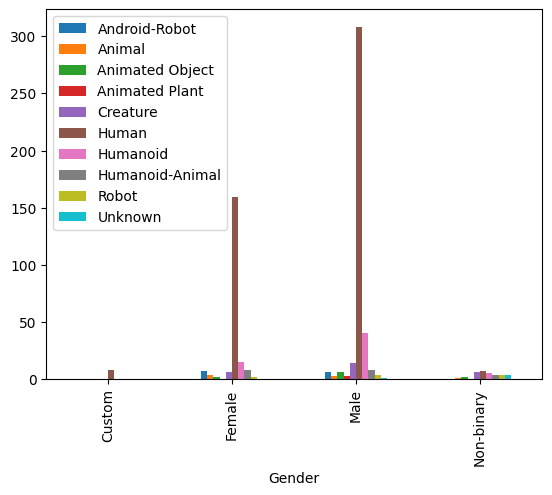

In [ ]:
#Another graph format might be better tree graph as this is too full:
gen_species = df_char[['Gender','Species']].value_counts().unstack()
ax = gen_species.plot(kind='bar')

ax.legend()
plt.show()

### In this particular dataset when gender and species studied: Just under half of the characters in this dataset a male humans. A quarter of characters are female human Non-binary humans are just over 1% of characters in this dataset


Romantic interest by gender and age: 
* Top row not romantic interest
* Middle row romantic interest
* Bottom row option to be/not be romantic interest

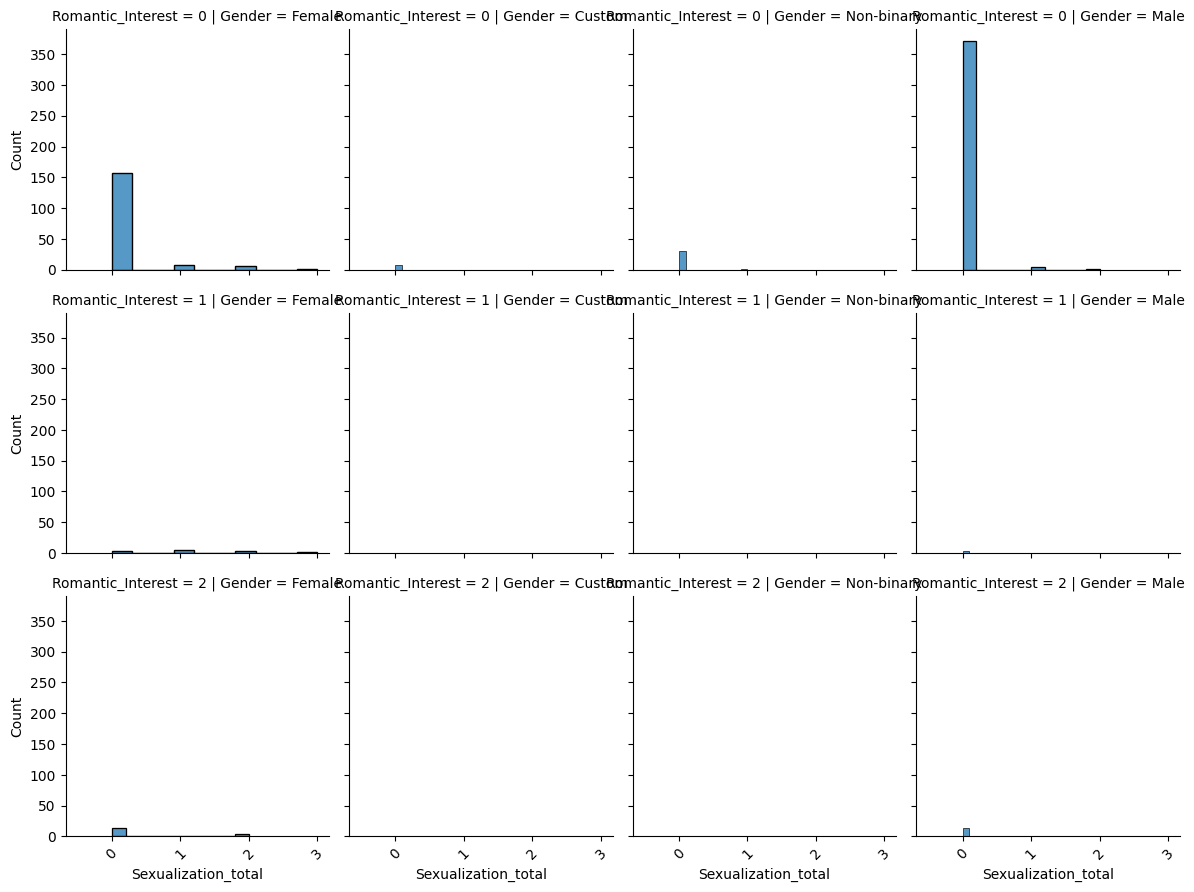

In [ ]:
g = sns.FacetGrid(df_char, col='Gender', row='Romantic_Interest')
g.map(sns.histplot, 'Sexualization_total', bins=10) 

for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

## Gender and alliance focus: Does a character's gender impact their alliance in games e.g. is there an trend or overrepresentation of a gender allying with a games antagonist?

In [45]:
gen_ally = df_char[['Gender', 'Alliance']].value_counts()
gen_ally 

Gender      Alliance   
Male        Protagonist    241
Female      Protagonist    153
Male        Antagonist     109
            Both            43
Female      Both            30
Non-binary  Protagonist     24
Female      Antagonist      20
Custom      Protagonist      8
Non-binary  Antagonist       8
            Both             1
Name: count, dtype: int64

In [46]:
genally_pc = round(gen_ally * 100,2).astype(float)

genally_pc = genally_pc.apply(lambda x: f"{x:}%")

genally_pc

Gender      Alliance   
Male        Protagonist    24100.0%
Female      Protagonist    15300.0%
Male        Antagonist     10900.0%
            Both            4300.0%
Female      Both            3000.0%
Non-binary  Protagonist     2400.0%
Female      Antagonist      2000.0%
Custom      Protagonist      800.0%
Non-binary  Antagonist       800.0%
            Both             100.0%
Name: count, dtype: object

<Axes: xlabel='Gender'>

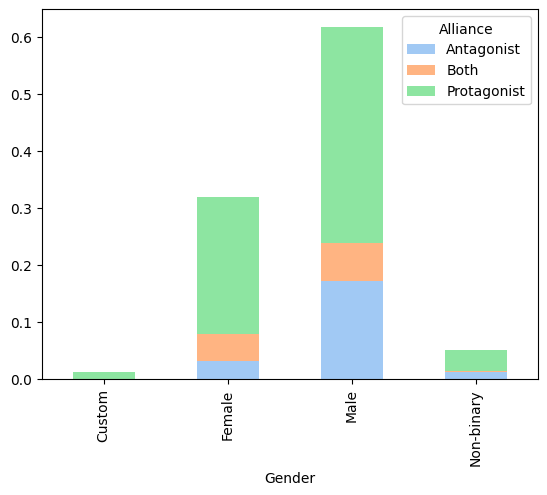

In [65]:
#ORIGINAL 

olors = sns.color_palette('pastel', n_colors=3)

gen_ally = df_char[['Gender', 'Alliance']].value_counts(normalize= True)
gen_ally_df = gen_ally.unstack()
gen_ally_df.plot(kind='bar', stacked=True, color = colors)


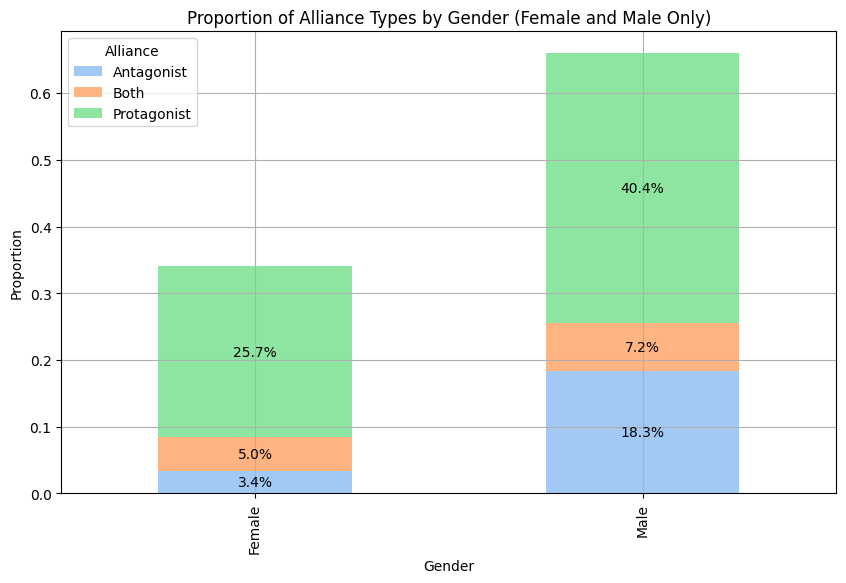

In [66]:

# Filtering only gender = female and male
df_filtered = df_char[df_char['Gender'].isin(['Female', 'Male'])]

gen_ally = df_filtered[['Gender', 'Alliance']].value_counts(normalize=True)
gen_ally_df = gen_ally.unstack()


colors = sns.color_palette('pastel', n_colors=3)

# bars with pastel
ax = gen_ally_df.plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))
plt.grid(True)

# adding % in each bar
for c in ax.containers:
    labels = [f'{v.get_height() * 100:.1f}%' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=10)

# labs and title
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.title('Proportion of Alliance Types by Gender (Female and Male Only)')

plt.show()

In [ ]:
#data regarding non-binary to be merged with games.csv to determine the countries these games are from:
df_non_b = df_char[df_char['Gender'] == 'Non-binary'][['Gender', 'Game', 'Sexualization_total']]
df_non_b

,Gender,Game,Sexualization_total
11,Non-binary,UT,0
16,Non-binary,JRN,1
56,Non-binary,UT,0
207,Non-binary,BSI,0
222,Non-binary,JRN,0
223,Non-binary,JRN,0
224,Non-binary,JRN,0
257,Non-binary,TN,0
258,Non-binary,TN,0
263,Non-binary,ER,0


## Mergining of characters and games for further insight

In [ ]:
df_char.columns

Index(['Name', 'Gender', 'Game', 'Age_range', 'Playable',
       'Sexualization_total', 'Id', 'Species', 'Alliance', 'Function',
       'Romantic_Interest'],
      dtype='object')

In [ ]:
df_game.columns

Index(['Unnamed: 0', 'Game_Id', 'Title', 'Release', 'Developer', 'Country',
       'Protagonist', 'Protagonist_Non_Male', 'Percentage_non_male'],
      dtype='object')

In [ ]:
df_char.rename(columns={'Game': 'Game_Id'}, inplace=True)
print(df_char.columns)

Index(['Name', 'Gender', 'Game_Id', 'Age_range', 'Playable',
       'Sexualization_total', 'Id', 'Species', 'Alliance', 'Function',
       'Romantic_Interest'],
      dtype='object')


In [ ]:
df_game = df_game.drop(columns='Unnamed: 0', axis=1)
df_game.head(1)

,Game_Id,Title,Release,Developer,Country,Protagonist,Protagonist_Non_Male,Percentage_non_male
0,GTAV,Grand Theft Auto V,Sep-13,Rockstar North,GBR,3,0,18%


In [ ]:
game_charac = pd.merge(df_game, df_char, how='inner', on=['Game_Id'])
game_charac.head(2)

,Game_Id,Title,Release,Developer,Country,Protagonist,Protagonist_Non_Male,Percentage_non_male,Name,Gender,Age_range,Playable,Sexualization_total,Id,Species,Alliance,Function,Romantic_Interest
0,GTAV,Grand Theft Auto V,Sep-13,Rockstar North,GBR,3,0,18%,Amanda,Female,Middle-aged,0,3,GTAV_Amanda,Human,Both,SC,1
1,GTAV,Grand Theft Auto V,Sep-13,Rockstar North,GBR,3,0,18%,Tracy,Female,Young adult,0,3,GTAV_Tracy,Human,Both,SC,0


## Female character focus
* How many games did these come from : 58
* Which countries and year of game release? Canada is highest 11 in one game 'I was a teenage Exocolonist' in 2022
* Count of games by year

In [ ]:
fem_game = game_charac[game_charac['Gender'] == 'Female'][['Title']].nunique()
fem_game

Title    58
dtype: int64

In [ ]:
non_m = game_charac[game_charac['Gender'] == 'Female'][['Title','Country', 'Release']].value_counts()
non_m.head(2)

Title                        Country  Release
I Was a Teenage Exocolonist  CAN      Aug-22     11
The Walking Dead             USA      Apr-12      9
Name: count, dtype: int64

## Non-binary character focus
* How many games did these come from : 21
* Which games contain non-binary characters and year of game release?
* Count of games by year

In [ ]:
#How many games using nunique()
non_b_gcount = game_charac[game_charac['Gender'] == 'Non-binary']['Title'].nunique()
non_b_gcount

21

In [ ]:
non_b_nameyr = game_charac[game_charac['Gender'] == 'Non-binary'][['Title', 'Release' ]]
non_b_nameyr

,Title,Release
161,Undertale,Sep-15
165,Undertale,Sep-15
206,BioShock Infinite,Mar-13
221,Journey,Mar-12
222,Journey,Mar-12
223,Journey,Mar-12
224,Journey,Mar-12
257,Tunic,Mar-22
258,Tunic,Mar-22
263,Elden Ring,Feb-22


In [ ]:
non_b = game_charac[game_charac['Gender'] == 'Non-binary'][['Country', 'Release']].value_counts()
non_b

Country  Release
USA      Mar-12     4
AUS      Feb-17     2
CAN      Mar-22     2
USA      Sep-15     2
JPN      Feb-22     2
AUT      Feb-17     2
GBR      Aug-22     2
CAN      Aug-22     2
AUT      Mar-20     2
         Mar-15     2
FIN      May-13     1
FRA      Aug-18     1
         Aug-20     1
CAN      Jan-18     1
JPN      Feb-17     1
         Sep-15     1
USA      Jun-21     1
         Jun-22     1
         Mar-13     1
         Nov-14     1
         Sep-21     1
Name: count, dtype: int64

In [ ]:
non_male = game_charac[game_charac['Gender'] != 'Male'][['Country', 'Release']].value_counts()
non_male

Country  Release
CAN      Aug-22     14
USA      Apr-12      9
JPN      Feb-22      9
AUS      Feb-17      8
JPN      Sep-16      8
         Feb-17      8
CAN      Apr-14      7
USA      Jan-14      7
         Oct-18      7
         Dec-19      7
         Apr-17      6
POL      May-15      6
AUT      Feb-17      6
USA      Jun-20      5
         Nov-20      5
         Sep-15      5
JPN      Nov-19      5
         Mar-17      5
         Jul-19      5
USA      Sep-21      5
AUT      Mar-20      5
JPN      Jul-17      4
FRA      Sep-21      4
FIN      May-13      4
USA      Jun-22      4
         Mar-12      4
         Mar-13      4
         Nov-14      4
BEL      Sep-17      4
GBR      Aug-22      4
JPN      Mar-19      4
USA      Sep-12      4
JPN      Mar-15      4
AUT      Mar-15      4
CAN      Jan-18      4
USA      Jun-13      3
         Jun-21      3
CAN      Nov-19      3
JPN      Sep-14      3
         Mar-14      3
         Oct-16      3
FRA      Aug-18      2
JPN      Oct-17  

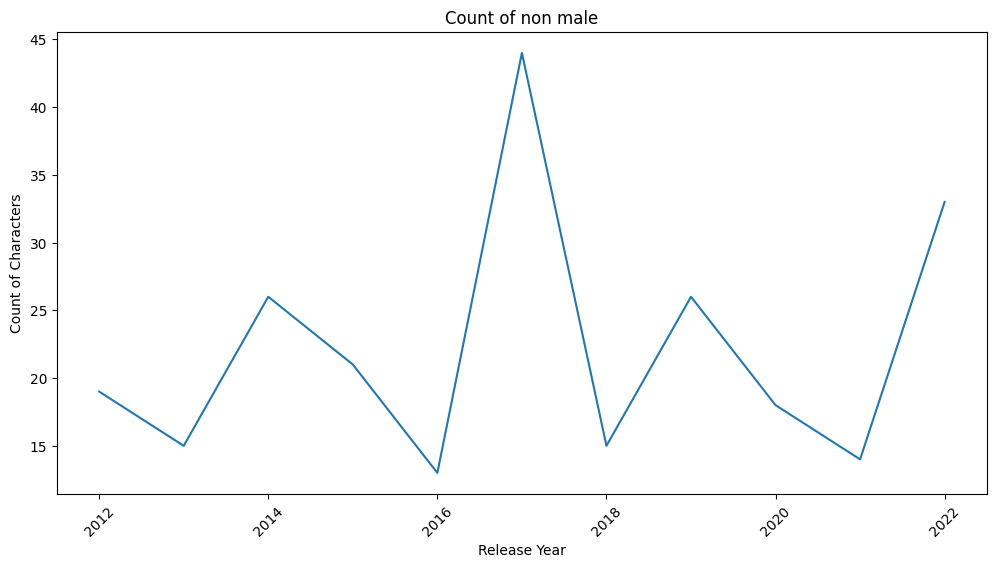

In [ ]:
non_male['Release_Year'] = pd.to_datetime(non_male['Release'], format='%b-%y').dt.year #create a new column release year

release_year_counts = non_male.groupby('Release_Year')['Release'].count().reset_index(name='Count')

plt.figure(figsize=(12, 6))
plt.plot(release_year_counts['Release_Year'], release_year_counts['Count'])
plt.xlabel('Release Year')
plt.ylabel('Count of Characters')
plt.title('Count of non male')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


# I can not add labels on this plot!?